In [7]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy
import h5py
import matplotlib
%matplotlib inline
from astropy.utils.data import download_file  #import file from URL
from matplotlib.ticker import NullFormatter
import astropy.table
import subprocess as sp
import glob
#import healpy as hp

In [4]:
specz = astropy.table.Table.read('/home/raulteixeira/scratch-midway2/CosmicShearData/specdataDR2.fits')
data = astropy.table.Table.read('/home/raulteixeira/scratch-midway2/CosmicShearData/pzinput/fits/shear_test_coadd_object_gold.fits')

In [9]:
from astropy.coordinates import SkyCoord
from astropy import units as u
spec_cd = SkyCoord(ra=specz['RA']*u.degree, dec=specz['DEC']*u.degree)
bpz_cd = SkyCoord(ra=data['RA']*u.deg, dec=data['DEC']*u.deg)
idx, d2d, d3d = spec_cd.match_to_catalog_sky(bpz_cd)

In [10]:
good_matches = d2d < 1.0*u.arcsec
print(len(np.unique(idx[good_matches])), np.count_nonzero(good_matches))

403 403


(array([46., 30., 34., 97., 53., 59., 33., 24., 12.,  8.,  0.,  3.,  1.,
         0.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0.00681805, 0.019245  , 0.03167194, 0.04409889, 0.05652584,
        0.06895279, 0.08137973, 0.09380668, 0.10623363, 0.11866058,
        0.13108752, 0.14351447, 0.15594142, 0.16836837, 0.18079531,
        0.19322226, 0.20564921, 0.21807616, 0.2305031 , 0.24293005,
        0.255357  ]),
 <BarContainer object of 20 artists>)

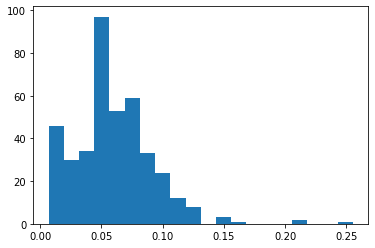

In [16]:
plt.hist(specz[good_matches]['zspec'], bins=20)